In [2]:
import numpy as np
import math

In [3]:
def fibonacci_sphere(n_samples):
    """Distributes n_samples on a unit fibonacci_sphere"""
    points = []
    phi = math.pi * (math.sqrt(5.) - 1.)

    for i in range(n_samples):
        y = 1 - (i / float(n_samples - 1)) * 2
        radius = math.sqrt(1 - y * y)

        theta = phi * i

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return np.array(points)

In [49]:
a = fibonacci_sphere(100)
a

array([[ 0.        ,  1.        ,  0.        ],
       [-0.14746625,  0.97979798, -0.13509117],
       [ 0.02459999,  0.95959596,  0.28030418],
       [ 0.20859697,  0.93939394, -0.2720778 ],
       [-0.38778989,  0.91919192,  0.06859457],
       [ 0.36953897,  0.8989899 ,  0.23507044],
       [-0.12388644,  0.87878788, -0.4608514 ],
       [-0.23629311,  0.85858586,  0.45496801],
       [ 0.51200554,  0.83838384, -0.1869836 ],
       [-0.53146133,  0.81818182, -0.21937951],
       [ 0.25544528,  0.7979798 ,  0.54587173],
       [ 0.18811169,  0.77777778, -0.59972971],
       [-0.56476424,  0.75757576,  0.32729242],
       [ 0.65972982,  0.73737374,  0.14503975],
       [-0.40080568,  0.71717172, -0.57010484],
       [-0.09215509,  0.6969697 ,  0.71115447],
       [ 0.56293203,  0.67676768, -0.47443971],
       [-0.75362477,  0.65656566, -0.03116475],
       [ 0.54678337,  0.63636364,  0.54412248],
       [-0.03638129,  0.61616162, -0.78677904],
       [-0.51449868,  0.5959596 ,  0.616

In [50]:
listener_forward = np.array([0,1,0])
listener_left = np.array([-1,0,0])

In [51]:
listener_up = np.cross(listener_forward, listener_left)
listener_basis = np.stack((listener_forward, listener_left, listener_up), axis=-1)

        #Compute Azimuths and Elevation
listener_coordinates = a @ listener_basis
listener_coordinates

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.97979798,  0.14746625, -0.13509117],
       [ 0.95959596, -0.02459999,  0.28030418],
       [ 0.93939394, -0.20859697, -0.2720778 ],
       [ 0.91919192,  0.38778989,  0.06859457],
       [ 0.8989899 , -0.36953897,  0.23507044],
       [ 0.87878788,  0.12388644, -0.4608514 ],
       [ 0.85858586,  0.23629311,  0.45496801],
       [ 0.83838384, -0.51200554, -0.1869836 ],
       [ 0.81818182,  0.53146133, -0.21937951],
       [ 0.7979798 , -0.25544528,  0.54587173],
       [ 0.77777778, -0.18811169, -0.59972971],
       [ 0.75757576,  0.56476424,  0.32729242],
       [ 0.73737374, -0.65972982,  0.14503975],
       [ 0.71717172,  0.40080568, -0.57010484],
       [ 0.6969697 ,  0.09215509,  0.71115447],
       [ 0.67676768, -0.56293203, -0.47443971],
       [ 0.65656566,  0.75362477, -0.03116475],
       [ 0.63636364, -0.54678337,  0.54412248],
       [ 0.61616162,  0.03638129, -0.78677904],
       [ 0.5959596 ,  0.51449868,  0.616

In [52]:
azimuths = np.degrees(np.arctan2(listener_coordinates[:, 1], listener_coordinates[:, 0]))
elevations = np.degrees(np.arctan(listener_coordinates[:, 2]/np.linalg.norm(listener_coordinates[:, 0:2],axis=-1)+1e-8))

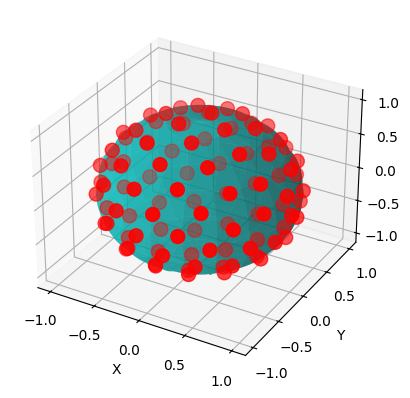

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


phi, theta = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
x_sfera = np.sin(theta) * np.cos(phi)
y_sfera = np.sin(theta) * np.sin(phi)
z_sfera = np.cos(theta)

n_punti = 10
phi_punti = np.random.uniform(0, 2 * np.pi, n_punti)
theta_punti = np.random.uniform(0, np.pi, n_punti)

# Conversione da gradi a radianti
azimuths_rad = np.deg2rad(azimuths)
elevations_rad = np.deg2rad(elevations)

# Conversione da coordinate sferiche a cartesiane
x_punti = np.cos(elevations_rad) * np.cos(azimuths_rad)
y_punti = np.cos(elevations_rad) * np.sin(azimuths_rad)
z_punti = np.sin(elevations_rad)

# Creazione della figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot della superficie della sfera
ax.plot_surface(x_sfera, y_sfera, z_sfera, color='c', alpha=0.6, rstride=5, cstride=5)

# Plot dei punti sulla superficie della sfera
ax.scatter(x_punti, y_punti, z_punti, color='r', s=100)

# Impostazione degli assi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()